### **Summary**

For this project, **I have chosen to work on a dataset containing salary information for machine learning engineers**, encompassing historical data from 2020 to the present.<br>
The dataset includes pertinent features such as **level of experience**, **job title**, **employment type**, **salary amount**, **employee residence**, **remote work ratio**, **company location**, and **company size**.<br>
**These features will facilitate the analysis of salary trends in the future**.

### **Objective and Comercial Context**
The objective of this project is to **predict future salaries for machine learning engineers**.<br>
**Understanding the factors influencing current salaries will help develop models** to forecast future salary trends and **provide valuable insights for both job seekers and employers in the field**.

### **Dataset Features**

- **work_year**: The year in which the salary data was collected (e.g., 2024).
- **experience_level**: The level of experience of the employee (e.g., EN for Entry-Level, MI for Mid-Level, SE for Senior and EX for Executive).
- **employment_type**: The type of employment (e.g., FT for Full-Time, PT for Part-Time, CT for Contract and FL for Freelance).
- **job_title**: The title of the job (e.g., Data Scientist).
- **salary**: The salary amount.
- **salary_currency**: The currency in which the salary is denominated (e.g., USD for US Dollars).
- **salary_in_usd**: The salary amount converted to US Dollars.
- **employee_residence**: The country of residence of the employee (e.g., AU for Australia).
- **remote_ratio**: The ratio indicating the level of remote work (0 for no remote work).
- **company_location**: The location of the company (e.g., AU for Australia).
- **company_size**: The size of the company (e.g., S for Small, M for Medium and L for Large).

### **Hypothesis**

Using historical data and modeling techniques, a **simple or multiple linear regression model can be developed to predict** the future value of **salaries** with at least **70% accuracy**.

### **Exploratory Data Analysis (EDA)** 

In [38]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette= 'Set2', font_scale= 1.2)
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Loading the dataset
url= 'https://raw.githubusercontent.com/EmaRamos/RamosGaspar-Emanuel-61140/main/salaries.csv'
df= pd.read_csv(url)

In [40]:
#DataFrame's structure, including column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [41]:
#Changing column data types to optimize memory usage and facilitate the analysis of the data
df['experience_level']= df['experience_level'].astype('category')
df['employment_type']= df['employment_type'].astype('category')
df['job_title']= df['job_title'].astype('category')
df['salary_currency']= df['salary_currency'].astype('category')
df['employee_residence']= df['employee_residence'].astype('category')
df['company_location']= df['company_location'].astype('category')
df['company_size']= df['company_size'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           16494 non-null  int64   
 1   experience_level    16494 non-null  category
 2   employment_type     16494 non-null  category
 3   job_title           16494 non-null  category
 4   salary              16494 non-null  int64   
 5   salary_currency     16494 non-null  category
 6   salary_in_usd       16494 non-null  int64   
 7   employee_residence  16494 non-null  category
 8   remote_ratio        16494 non-null  int64   
 9   company_location    16494 non-null  category
 10  company_size        16494 non-null  category
dtypes: category(7), int64(4)
memory usage: 656.4 KB


In [42]:
#Displaying the updated DataFrame with optimized data types
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [43]:
#Categorial feature's cardinality
categorical_columns= df.select_dtypes(include= ['category'])
cardinality= pd.DataFrame({'Quantity': categorical_columns.nunique(), '%': ((categorical_columns.nunique()) / (categorical_columns.shape[0]) * 100).round(2)})
print(cardinality)
print('-' * 30) #Line separator
print("Categorical feature's like 'job_title', 'salary_currency', 'employee_residence' and 'company_location' have a high diversity of unique data, suggesting they may require special processing during data analysis.")

                    Quantity     %
experience_level           4  0.02
employment_type            4  0.02
job_title                155  0.94
salary_currency           23  0.14
employee_residence        88  0.53
company_location          77  0.47
company_size               3  0.02
------------------------------
Categorical feature's like 'job_title', 'salary_currency', 'employee_residence' and 'company_location' have a high diversity of unique data, suggesting they may require special processing during data analysis.


In [44]:
#Generating descriptive statistics for numerical columns in the DataFrame
print(df.describe().astype(int))
print('-' * 30) #Line separator
print('''The results show that most records are from the year 2023, with some from 2024.
Salaries in USD exhibit high variability, with an average salary of $149.713 and a standard deviation of $68.516.
The minimum recorded salary is $15.000 and the maximum is $800.000, suggesting the presence of significant outliers.
The remote work ratio varies considerably. Most jobs are not remote, but a quarter of them are fully remote.
These data suggest a need for further review to ensure the quality and accuracy of the dataset.''')

       work_year    salary  salary_in_usd  remote_ratio
count      16494     16494          16494         16494
mean        2023    163787         149713            32
std            0    340601          68516            46
min         2020     14000          15000             0
25%         2023    102000         101517             0
50%         2023    142200         141300             0
75%         2024    187342         185900           100
max         2024  30400000         800000           100
------------------------------
The results show that most records are from the year 2023, with some from 2024.
Salaries in USD exhibit high variability, with an average salary of $149.713 and a standard deviation of $68.516.
The minimum recorded salary is $15.000 and the maximum is $800.000, suggesting the presence of significant outliers.
The remote work ratio varies considerably. Most jobs are not remote, but a quarter of them are fully remote.
These data suggest a need for further review 

In [45]:
#Generating descriptive statistics for categorical columns in the DataFrame
print(df.describe(include= 'category'))
print('-' * 30) #Line separator
print('''These data indicate that the majority of employees have a Senior (SE) level of experience, work Full-Time (FT) and the most common job title is Data Engineer.
Additionally, most salaries are paid in USD and both employees and companies are predominantly located in the United States. The most common company size is Medium (M).
This suggests a significant concentration in the U.S. labor market and a prevalence of medium-sized companies.''')

       experience_level employment_type      job_title salary_currency  \
count             16494           16494          16494           16494   
unique                4               4            155              23   
top                  SE              FT  Data Engineer             USD   
freq              10652           16414           3456           15254   

       employee_residence company_location company_size  
count               16494            16494        16494  
unique                 88               77            3  
top                    US               US            M  
freq                14427            14478        15268  
------------------------------
These data indicate that the majority of employees have a Senior (SE) level of experience, work Full-Time (FT) and the most common job title is Data Engineer.
Additionally, most salaries are paid in USD and both employees and companies are predominantly located in the United States. The most common company 

In [46]:
#Creating a DataFrame to show the count and percentage distribution of 'work_year' values
work_year= pd.DataFrame({'Quantity': df['work_year'].value_counts(), '%': (df['work_year'].value_counts(normalize= True) * 100).round(2)})
print(work_year)
print('-' * 30) #Line separator
print('The majority of data points are from 2023 (51.65%) and 2024 (36.54%), with fewer data points from 2022 (10.03%), 2021 (1.32%) and 2020 (0.45%).')

           Quantity      %
work_year                 
2023           8519  51.65
2024           6027  36.54
2022           1655  10.03
2021            218   1.32
2020             75   0.45
------------------------------
The majority of data points are from 2023 (51.65%) and 2024 (36.54%), with fewer data points from 2022 (10.03%), 2021 (1.32%) and 2020 (0.45%).


In [47]:
#Creating a DataFrame to show the count and percentage distribution of 'experience_level' values
experience_level= pd.DataFrame({'Quantity': df['experience_level'].value_counts(), '%': (df['experience_level'].value_counts(normalize= True) * 100).round(2)})
print(experience_level)
print('-' * 30) #Line separator
print('Senior (SE) level is the most common, comprising 64.58% of the data, followed by Mid-Level (MI) at 24.40%, Entry-Level (EN) at 8.00% and Executive (EX) at 3.03%.')

                  Quantity      %
experience_level                 
SE                   10652  64.58
MI                    4024  24.40
EN                    1319   8.00
EX                     499   3.03
------------------------------
Senior (SE) level is the most common, comprising 64.58% of the data, followed by Mid-Level (MI) at 24.40%, Entry-Level (EN) at 8.00% and Executive (EX) at 3.03%.


In [48]:
#Creating a DataFrame to show the count and percentage distribution of 'employment_type' values
employment_type= pd.DataFrame({'Quantity': df['employment_type'].value_counts(), '%': (df['employment_type'].value_counts(normalize= True) * 100).round(2)})
print(employment_type)
print('-' * 30) #Line separator
print('Full-Time (FT) employment is the most common, comprising 99.51% of the data, followed by Part-Time (PT) at 0.23%, Contract (CT) at 0.17% and Freelance (FL) at 0.08%.')

                 Quantity      %
employment_type                 
FT                  16414  99.51
PT                     38   0.23
CT                     28   0.17
FL                     14   0.08
------------------------------
Full-Time (FT) employment is the most common, comprising 99.51% of the data, followed by Part-Time (PT) at 0.23%, Contract (CT) at 0.17% and Freelance (FL) at 0.08%.


In [49]:
#Creating a DataFrame to show the count and percentage distribution of 'salary_currency' values
salary_currency= pd.DataFrame({'Quantity': df['salary_currency'].value_counts(), '%': (df['salary_currency'].value_counts(normalize= True) * 100).round(2)})
print(salary_currency)
print('-' * 30) #Line separator
print('Most salaries are denominated in USD (92.48%), followed by GBP (British Pound Sterling) (3.73%) and EUR (2.72%), indicating the primary currencies represented in the dataset.')

                 Quantity      %
salary_currency                 
USD                 15254  92.48
GBP                   616   3.73
EUR                   449   2.72
CAD                    56   0.34
INR                    55   0.33
AUD                    12   0.07
CHF                     8   0.05
PLN                     7   0.04
SGD                     6   0.04
BRL                     5   0.03
DKK                     4   0.02
JPY                     4   0.02
HUF                     3   0.02
TRY                     3   0.02
THB                     2   0.01
NOK                     2   0.01
ILS                     2   0.01
PHP                     1   0.01
NZD                     1   0.01
CLP                     1   0.01
MXN                     1   0.01
HKD                     1   0.01
ZAR                     1   0.01
------------------------------
Most salaries are denominated in USD (92.48%), followed by GBP (British Pound Sterling) (3.73%) and EUR (2.72%), indicating the primary currenci

In [50]:
#Creating a DataFrame to show the count and percentage distribution of 'company_location' values
company_location= pd.DataFrame({'Quantity': df['company_location'].value_counts(), '%': (df['company_location'].value_counts(normalize= True) * 100).round(2)})
print(company_location)
print('-' * 30) #Line separator
print('''The majority of companies are located in the US (87.78%), followed by the UK (GB) at 4.21%, Canada (CA) at 2.76%, Spain (ES) at 0.81% and Germany (DE) at 0.64%.
Several other countries have very small representations, each comprising around 0.01% of the dataset.''')

                  Quantity      %
company_location                 
US                   14478  87.78
GB                     694   4.21
CA                     455   2.76
ES                     133   0.81
DE                     105   0.64
...                    ...    ...
IR                       1   0.01
CL                       1   0.01
MD                       1   0.01
OM                       1   0.01
AD                       1   0.01

[77 rows x 2 columns]
------------------------------
The majority of companies are located in the US (87.78%), followed by the UK (GB) at 4.21%, Canada (CA) at 2.76%, Spain (ES) at 0.81% and Germany (DE) at 0.64%.
Several other countries have very small representations, each comprising around 0.01% of the dataset.


In [51]:
#Creating a DataFrame to show the count and percentage distribution of 'company_size' values
company_size= pd.DataFrame({'Quantity': df['company_size'].value_counts(), '%': (df['company_size'].value_counts(normalize= True) * 100).round(2)})
print(company_size)
print('-' * 30) #Line separator
print('Medium-sized companies (M) are the most common, comprising 92.57% of the data, followed by Large (L) at 6.29% and Small (S) at 1.14%.')

              Quantity      %
company_size                 
M                15268  92.57
L                 1038   6.29
S                  188   1.14
------------------------------
Medium-sized companies (M) are the most common, comprising 92.57% of the data, followed by Large (L) at 6.29% and Small (S) at 1.14%.


Mean salaries by: experience_level
EX    195345
SE    163693
MI    125846
EN     92362
Name: salary_in_usd, dtype: int32
------------------------------


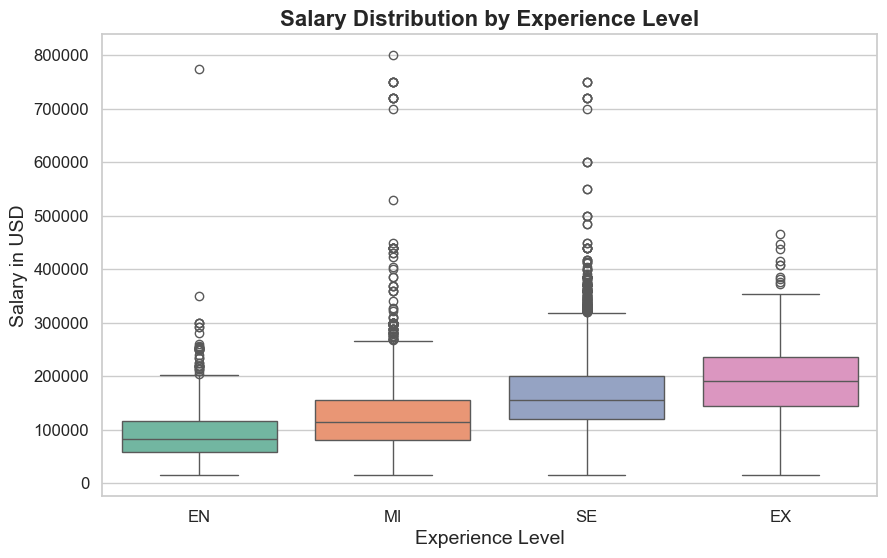

------------------------------
Higher experience levels correspond to higher salaries, with Executives (EX) generally earning significantly more than Mid-Level (MI) and Entry-Level (EN) positions.
This suggest a positive correlation between experience and salary.
Additionally, salaries exceeding $300.000 are notable outliers. However, rather than dismissing them as errors, it's important to interpret them in the context that very few individuals earn above $300.000.


In [52]:
#Relationship between experience level and salary: Machine learning engineers with higher experience levels (EX) have significantly higher salaries than those with less experience (EN and MI).
mean_salaries_by_experience= df.groupby('experience_level')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_experience.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Plotting boxplot to visualize salary distribution by experience level
plt.figure(figsize= (10, 6))
sns.boxplot(x= 'experience_level', y= 'salary_in_usd', data= df, order= ['EN', 'MI', 'SE', 'EX'], palette= 'Set2')
plt.title('Salary Distribution by Experience Level', fontsize= 16, fontweight= 'bold')
plt.xlabel('Experience Level', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Higher experience levels correspond to higher salaries, with Executives (EX) generally earning significantly more than Mid-Level (MI) and Entry-Level (EN) positions.
This suggest a positive correlation between experience and salary.
Additionally, salaries exceeding $300.000 are notable outliers. However, rather than dismissing them as errors, it's important to interpret them in the context that very few individuals earn above $300.000.''')

Mean salaries by: employment_type
FT    150015
CT    112578
PT     83750
FL     49220
Name: salary_in_usd, dtype: int32
------------------------------


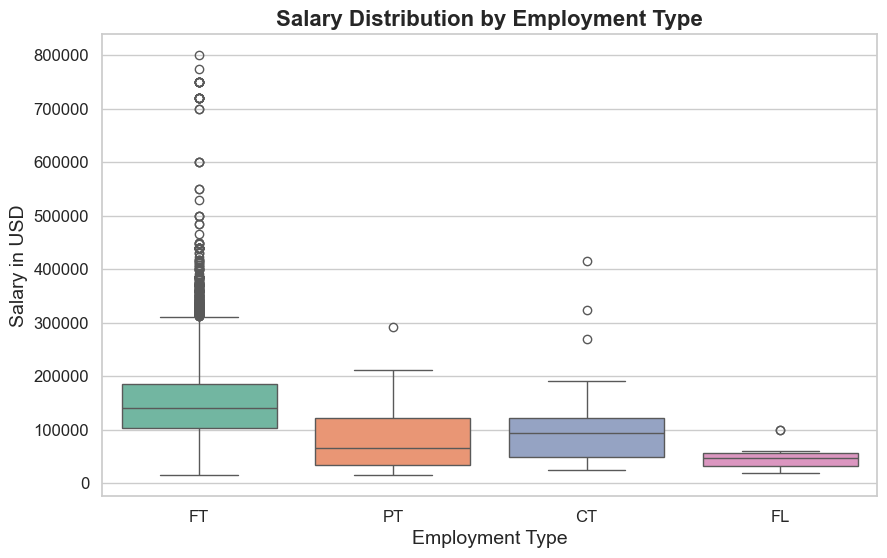

------------------------------
Full-Time employees (FT) generally have higher salaries compared to Part-Time (PT), Contract (CT) and Freelance (FL) employees, indicating that Full-Time employment tends to offer better financial compensation.
However, it's important to note that there is significant salary variability among Full-Time employees, highlighting that while the average salary is higher, individual earnings can vary widely.


In [53]:
#Impact of employment type on salary: Full-time employees (FT) have higher salaries than part-time (PT), contract (CT) and freelance (FL) employees.
mean_salaries_by_employment= df.groupby('employment_type')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_employment.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Plotting boxplot to visualize salary distribution by employment type
plt.figure(figsize= (10, 6))
sns.boxplot(x= 'employment_type', y= 'salary_in_usd', data= df, order= ['FT', 'PT', 'CT', 'FL'], palette= 'Set2')
plt.title('Salary Distribution by Employment Type', fontsize= 16, fontweight= 'bold')
plt.xlabel('Employment Type', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Full-Time employees (FT) generally have higher salaries compared to Part-Time (PT), Contract (CT) and Freelance (FL) employees, indicating that Full-Time employment tends to offer better financial compensation.
However, it's important to note that there is significant salary variability among Full-Time employees, highlighting that while the average salary is higher, individual earnings can vary widely.''')

Mean salaries by: remote_ratio
0      153184
100    145479
50      82984
Name: salary_in_usd, dtype: int32
------------------------------


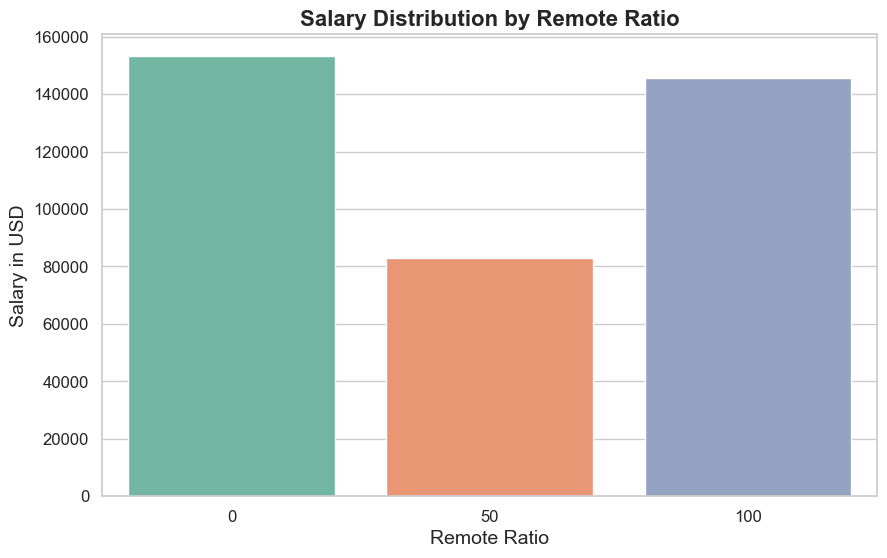

------------------------------
The salary distribution varies with the remote work ratio.
Employees working 100% on-site tend to earn a mean salary of $153.184 while those working fully remotely earn $145.479. However, hybrid workers earn notably less, with a mean salary of $82.984.
The variation could be due to differences in cost of living, job market demand and company policies for remote work compensation.


In [54]:
#Effect of remote work on salaries: Engineers who work remotely have different salaries compared to those who do not work remotely.
mean_salaries_by_work= df.groupby('remote_ratio')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_work.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Plotting barplot to visualize salary distribution by remote ratio
plt.figure(figsize= (10, 6))
sns.barplot(x= 'remote_ratio', y= 'salary_in_usd', data= df, order= ['0', '50', '100'], errorbar= None, palette= 'Set2')
plt.title('Salary Distribution by Remote Ratio', fontsize= 16, fontweight= 'bold')
plt.xlabel('Remote Ratio', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''The salary distribution varies with the remote work ratio.
Employees working 100% on-site tend to earn a mean salary of $153.184 while those working fully remotely earn $145.479. However, hybrid workers earn notably less, with a mean salary of $82.984.
The variation could be due to differences in cost of living, job market demand and company policies for remote work compensation.''')

Mean salaries by: company_location
QA    300000
IL    189772
PR    167500
US    156954
NZ    146761
       ...  
TR     23094
TH     22971
HN     20000
MD     18000
EC     16000
Name: salary_in_usd, Length: 77, dtype: int32
------------------------------


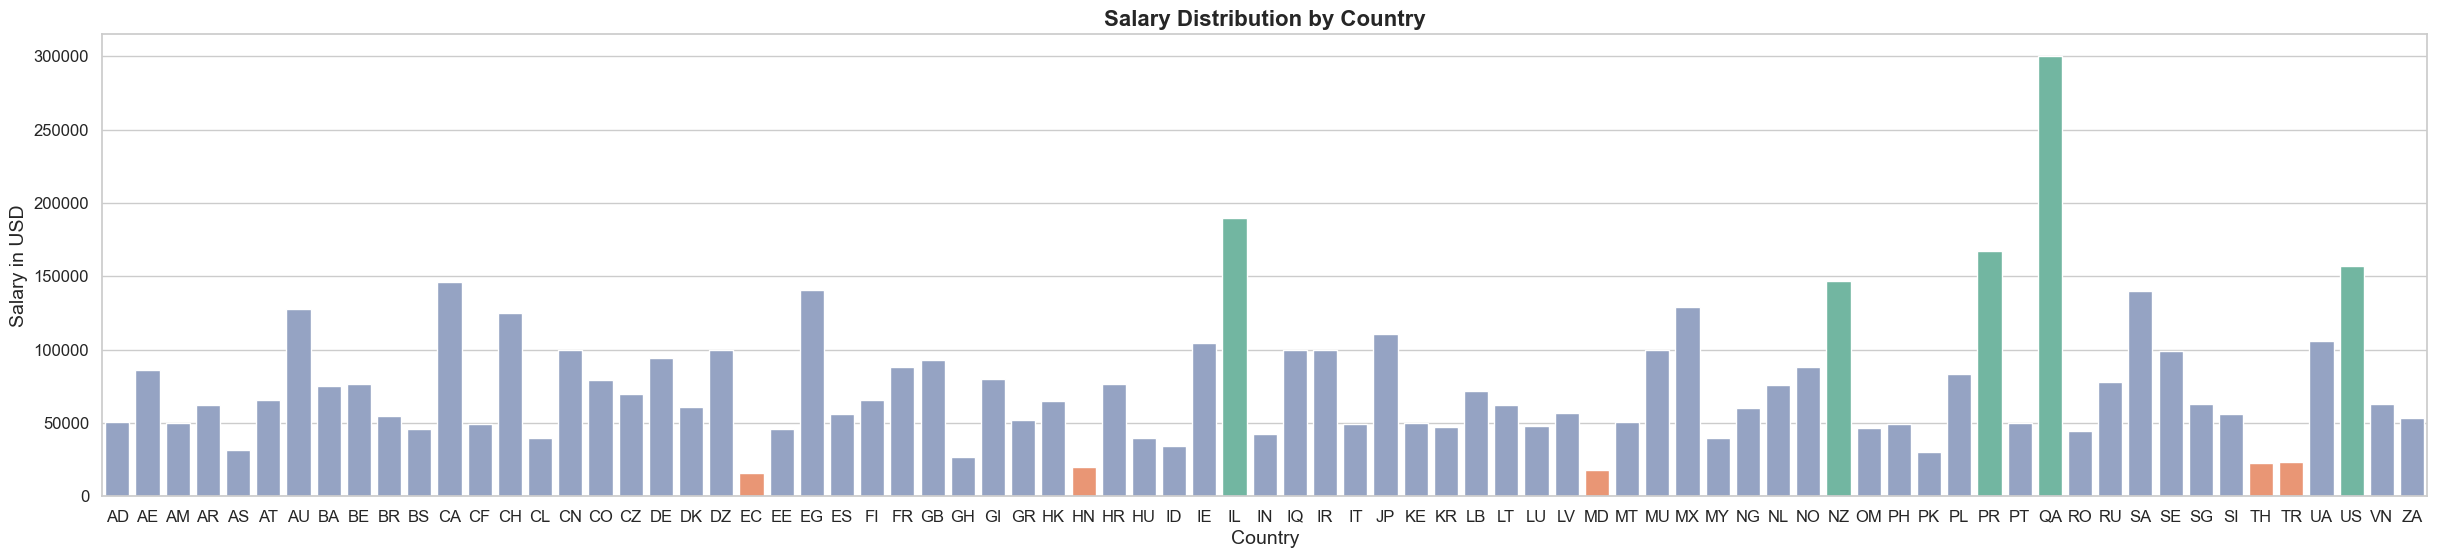

------------------------------
Company location significantly influences salaries.
There are noticeable differences in salary distributions across different countries reflecting economic conditions, cost of living, local job market demand and other factors influencing salary levels globally.
The highest average salary is in Qatar (QA) at $300.000, followed by Israel (IL) at $189.772 and Puerto Rico (PR) at $167.500.
The United States (US) has an average salary of $156.954, indicating a robust but slightly lower average compared to the top-ranking countries.
On the other side, countries like Turkey (TR), Thailand (TH), Honduras (HN), Moldova(MD) and Ecuador (EC) have significantly lower average salaries, ranging from $23.094 to $16.000.


In [55]:
#Influence of company location on salaries: The company's location (country) significantly influences machine learning engineer salaries.
mean_salaries_by_country= df.groupby('company_location')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_country.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Identifying the top and bottom 5 countries with the highest and lowest mean salaries
top_countries= mean_salaries_by_country.sort_values(ascending= False).head(5)
bottom_countries= mean_salaries_by_country.sort_values(ascending= False).tail(5)

#Defining a color palette
palette= sns.color_palette('Set2', 3)

#Function to assign colors based on country's mean salary rank
def assign_color(country):
    if country in top_countries:
        return palette[0]
    elif country in bottom_countries:
        return palette[1]
    else:
        return palette[2]

#Assigning colors to each country based on their mean salary rank
colors= [assign_color(country) for country in mean_salaries_by_country.index]

#Plotting barplot to visualize salary distribution by company location
plt.figure(figsize= (30, 6))
sns.barplot(x= 'company_location', y= 'salary_in_usd', data= df, errorbar= None, palette= colors)
plt.title('Salary Distribution by Country', fontsize= 16, fontweight= 'bold')
plt.xlabel('Country', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Company location significantly influences salaries.
There are noticeable differences in salary distributions across different countries reflecting economic conditions, cost of living, local job market demand and other factors influencing salary levels globally.
The highest average salary is in Qatar (QA) at $300.000, followed by Israel (IL) at $189.772 and Puerto Rico (PR) at $167.500.
The United States (US) has an average salary of $156.954, indicating a robust but slightly lower average compared to the top-ranking countries.
On the other side, countries like Turkey (TR), Thailand (TH), Honduras (HN), Moldova(MD) and Ecuador (EC) have significantly lower average salaries, ranging from $23.094 to $16.000.''')

              count    mean    std    min     25%     50%     75%     max
company_size                                                             
L              1038  140815  73789  15000   80250  136000  200000  423000
M             15268  151095  67856  15000  104800  143000  185900  800000
S               188   86627  57709  15809   50000   71089  115000  416000
------------------------------


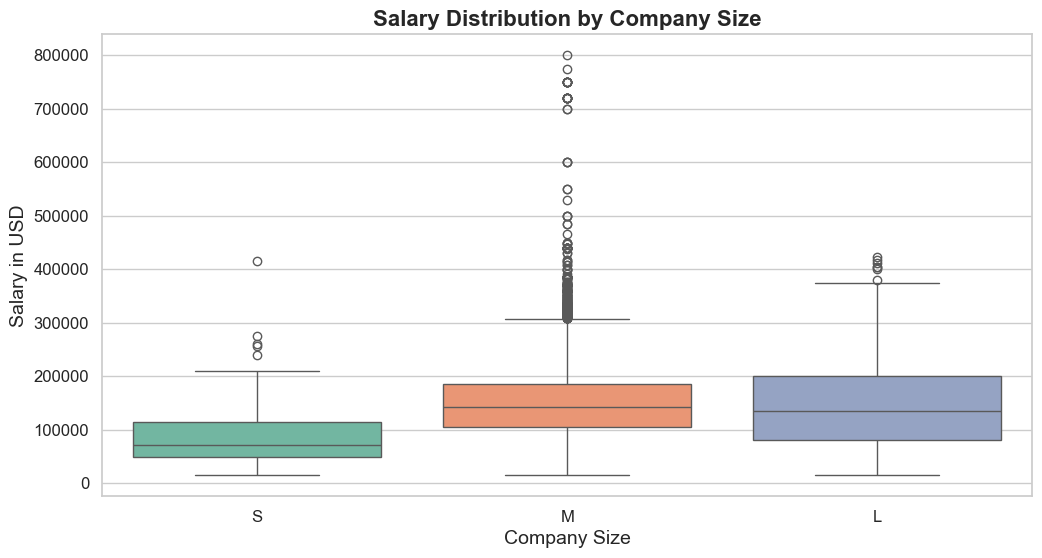

------------------------------
Engineers working in large companies (L) earn more than those in medium (M) and small (S) companies.
This is because larger companies generally have more resources and higher budgets, allowing them to offer more competitive salaries.
Medium-sized companies have the highest mean salary ($151.095), followed by large companies ($140.815) and small companies ($86.627).
However, the salary range is wider in medium and large companies, indicating more variability in salaries.


In [56]:
#Impact of company size on salary: Engineers working in large companies (L) earn more than those in small (S) and medium (M) companies.
company_size_salary_stats= df.groupby('company_size')['salary_in_usd'].describe().astype(int)
print(company_size_salary_stats)
print('-' * 30) #Line separator

#Plotting boxplot to visualize salary distribution by company size
plt.figure(figsize= (12, 6))
sns.boxplot(x= 'company_size', y= 'salary_in_usd', data= df, order= ['S', 'M', 'L'], palette= 'Set2')
plt.title('Salary Distribution by Company Size', fontsize= 16, fontweight= 'bold')
plt.xlabel('Company Size', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Engineers working in large companies (L) earn more than those in medium (M) and small (S) companies.
This is because larger companies generally have more resources and higher budgets, allowing them to offer more competitive salaries.
Medium-sized companies have the highest mean salary ($151.095), followed by large companies ($140.815) and small companies ($86.627).
However, the salary range is wider in medium and large companies, indicating more variability in salaries.''')

Mean salaries by: job_title
AI Architect                       252551
AI Developer                       135466
AI Engineer                        162989
AI Product Manager                 141766
AI Programmer                       62042
                                    ...  
Sales Data Analyst                  60000
Software Data Engineer             111627
Staff Data Analyst                  79917
Staff Data Scientist               134500
Staff Machine Learning Engineer    185000
Name: salary_in_usd, Length: 155, dtype: int32
------------------------------


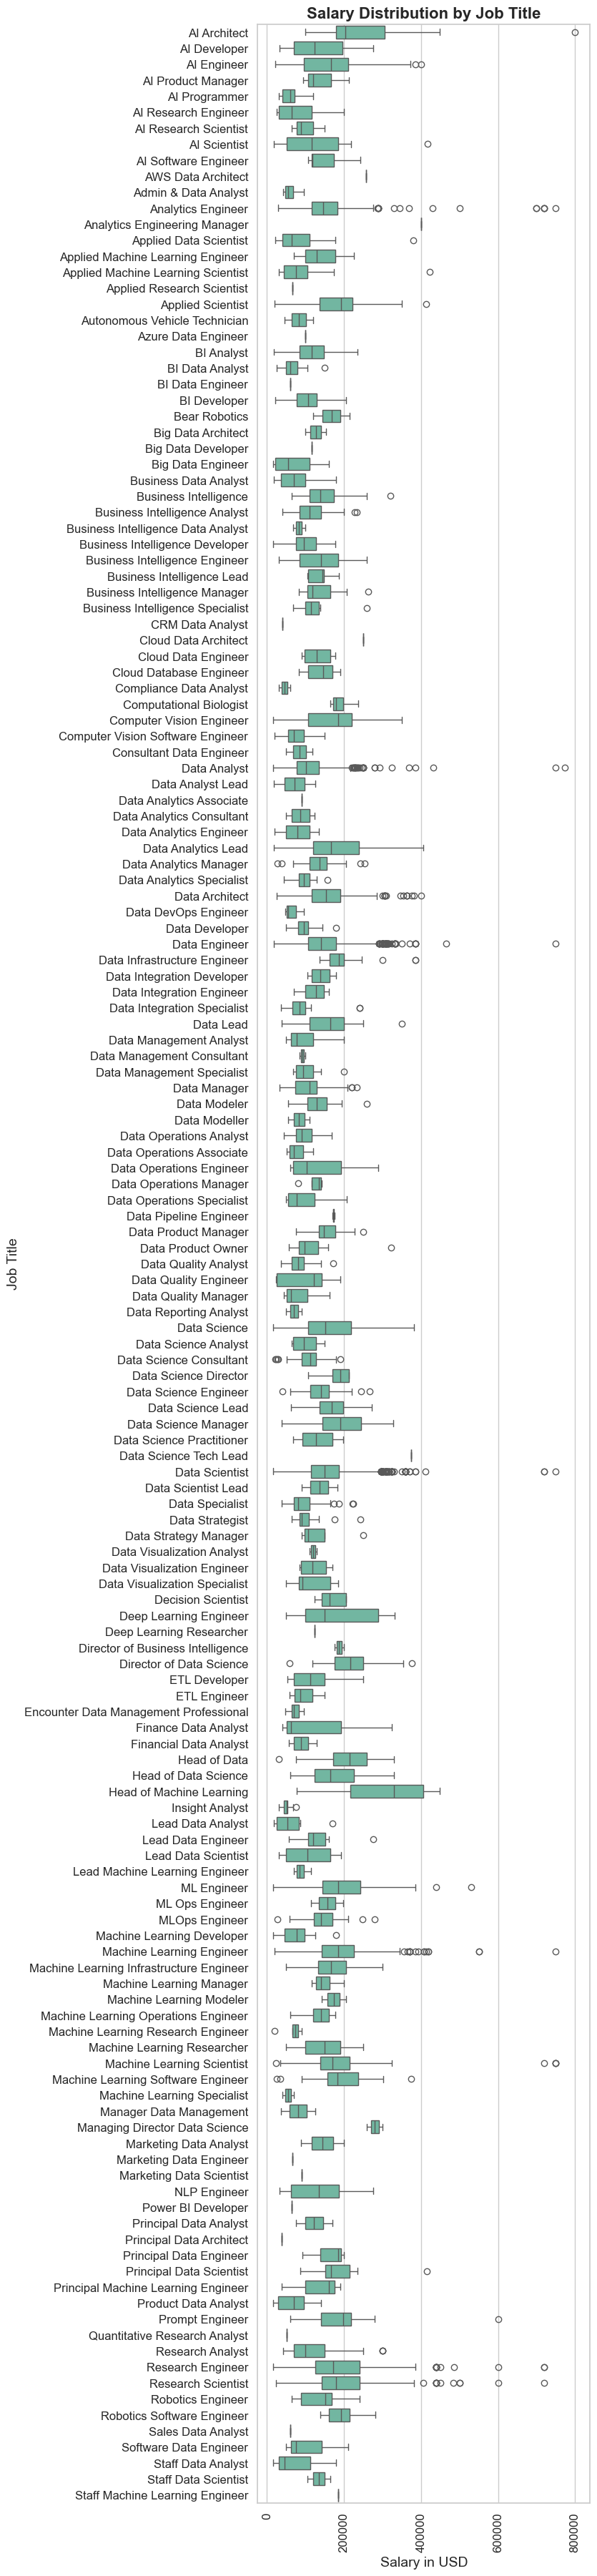

------------------------------
There are clear differences in salaries depending on the job title, highlighting the significant variability within roles.
More specialized positions or those with greater responsibility typically command higher salaries.
For instance, specialized roles such as AI Architect and Staff Machine Learning Engineer often have higher salaries compared to more general roles like AI Programmer.
This underscores not only the impact of job title on salary but also the substantial variability within similar positions.


In [57]:
#Salary discrepancies between different job titles: Different job titles in the machine learning field have different salary levels.
mean_salaries_by_job_title= df.groupby('job_title')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_job_title}')
print('-' * 30) #Line separator

#Plotting boxplot to visualize salary distribution by job title
plt.figure(figsize= (6, 45))
sns.boxplot(x= 'salary_in_usd', y= 'job_title', data= df)
plt.title('Salary Distribution by Job Title', fontsize= 16, fontweight= 'bold')
plt.xlabel('Salary in USD', fontsize= 14)
plt.ylabel('Job Title', fontsize= 14)
plt.xticks(rotation= 90, fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''There are clear differences in salaries depending on the job title, highlighting the significant variability within roles.
More specialized positions or those with greater responsibility typically command higher salaries.
For instance, specialized roles such as AI Architect and Staff Machine Learning Engineer often have higher salaries compared to more general roles like AI Programmer.
This underscores not only the impact of job title on salary but also the substantial variability within similar positions.''')


Mean salaries by: employee_residence
QA    300000
IL    262515
MY    200000
PR    166000
US    157220
       ...  
RS     25532
CR     20000
HN     20000
EC     16000
ID     15000
Name: salary_in_usd, Length: 88, dtype: int32
------------------------------


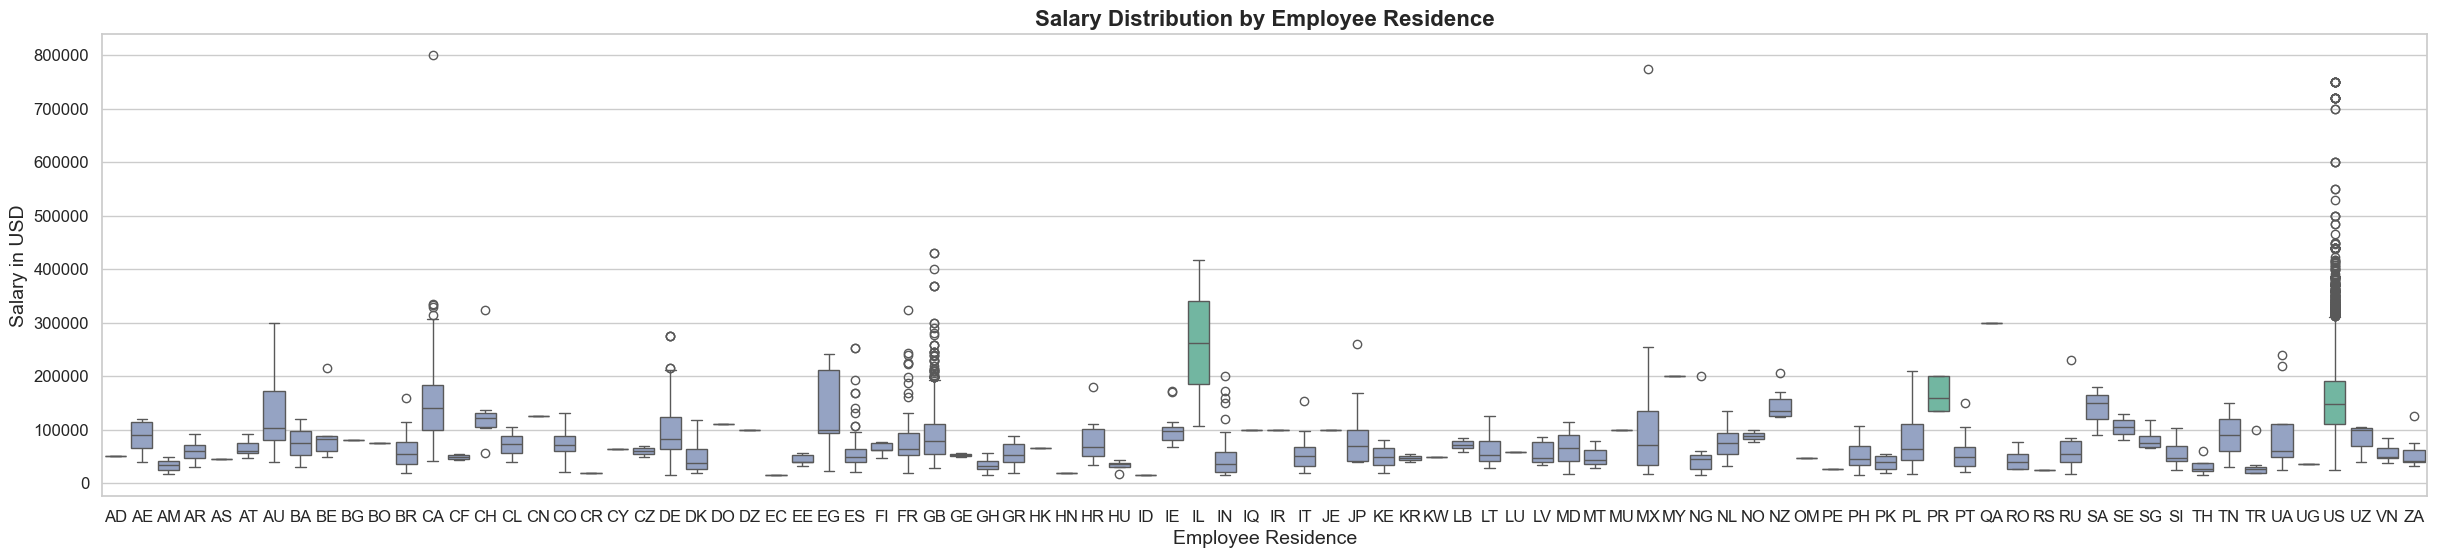

------------------------------
The country of residence significantly influences salaries.
There are noticeable differences in salary distributions across different countries reflecting economic conditions, cost of living, local job market demand and other factors influencing salary levels globally.
For instance, in the United States (US), while the average salary is $157.220, there is significant volatility within the country, with salaries ranging widely based on factors such as industry, location and specific job roles.
These variations underscore the complexity and variability in salary levels within the same country.


In [58]:
#Effect of employee residence on salary: The country of residence of the employee significantly affects the salary.
mean_salaries_by_residence= df.groupby('employee_residence')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_residence.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Identifying the top and bottom 5 countries with the highest and lowest mean salaries
top_countries= mean_salaries_by_residence.sort_values(ascending= False).head(5)
bottom_countries= mean_salaries_by_residence.sort_values(ascending= False).tail(5)

#Defining a color palette
palette= sns.color_palette('Set2', 3)

#Function to assign colors based on country's mean salary rank
def assign_color(country):
    if country in top_countries:
        return palette[0]
    elif country in bottom_countries:
        return palette[1]
    else:
        return palette[2]

#Assigning colors to each country based on their mean salary rank
colors= [assign_color(country) for country in mean_salaries_by_residence.index]

#Plotting boxplot to visualize salary distribution by employee residence
plt.figure(figsize= (30, 6))
sns.boxplot(x='employee_residence', y='salary_in_usd', data= df, palette= colors)
plt.title('Salary Distribution by Employee Residence', fontsize= 16, fontweight= 'bold')
plt.xlabel('Employee Residence', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''The country of residence significantly influences salaries.
There are noticeable differences in salary distributions across different countries reflecting economic conditions, cost of living, local job market demand and other factors influencing salary levels globally.
For instance, in the United States (US), while the average salary is $157.220, there is significant volatility within the country, with salaries ranging widely based on factors such as industry, location and specific job roles.
These variations underscore the complexity and variability in salary levels within the same country.''')

Mean salaries by: work_year
2023    153732
2024    150643
2022    134349
2020    102250
2021     99922
Name: salary_in_usd, dtype: int32
------------------------------


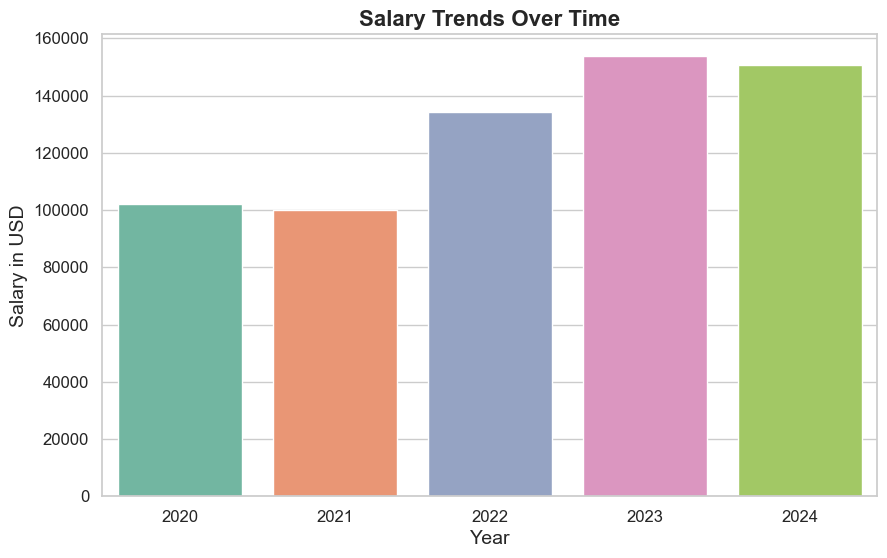

------------------------------
Salaries for machine learning engineers have increased over time.
This trend reflects the growing demand for machine learning expertise, the overall inflation and market adjustments in the tech industry.


In [59]:
#Salary trends over time: Salaries for machine learning engineers have increased over time.
mean_salaries_by_year= df.groupby('work_year')['salary_in_usd'].mean().astype(int)
print(f'Mean salaries by: {mean_salaries_by_year.sort_values(ascending= False)}')
print('-' * 30) #Line separator

#Plotting barplot to visualize salary distribution by work year
plt.figure(figsize= (10, 6))
sns.barplot(x= 'work_year', y= 'salary_in_usd', data= df, errorbar= None, palette= 'Set2')
plt.title('Salary Trends Over Time', fontsize= 16, fontweight= 'bold')
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Salary in USD', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Salaries for machine learning engineers have increased over time.
This trend reflects the growing demand for machine learning expertise, the overall inflation and market adjustments in the tech industry.''')

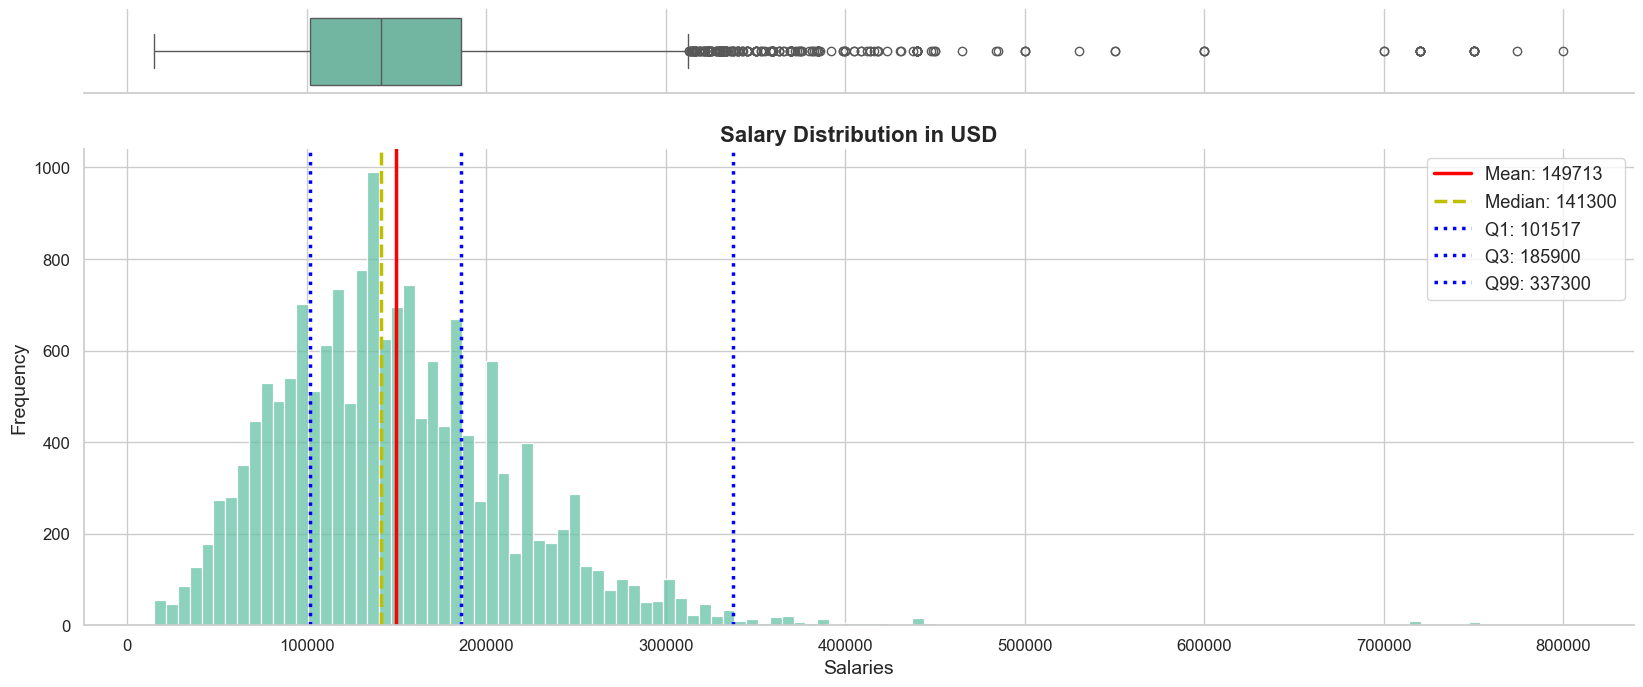

Mean: 149713

Median: 141300

Std: 68516

Q1: 101517

Q3: 185900

Q99: 337300

The distribution is skewed to the right.
------------------------------
CV: 45.76%

The data in the sample are heterogeneous. Therefore, the mean is not representative.
------------------------------
Given the right-skewed distribution (mean > median) and heterogeneous data (CV > 30%), I'll standardize salaries by taking the logarithm of the 'salary_in_usd' variable to reduce the impact of outliers.
These outliers in salary data are exceptional cases rather than errors. Notably, only 1% of individuals earn a salary exceeding $337.300, indicating the presence of high-income outliers.
This logarithmic transformation prepares the data for linear regression modeling, assuming the distribution approximates normality.


In [60]:
#Calculating descriptive statistics to understand the salary distribution in USD
mean= df['salary_in_usd'].mean().astype(int)
median= df['salary_in_usd'].median().astype(int)
std= df['salary_in_usd'].std().astype(int)
cv= std / mean * 100
q1= df['salary_in_usd'].quantile(0.25).astype(int)
q3= df['salary_in_usd'].quantile(0.75).astype(int)
q99= df['salary_in_usd'].quantile(0.99).astype(int)

#Creating a combined plot to visualize the distribution of salaries in USD

#Creating subplots
f, (ax_box, ax_hist)= plt.subplots(2, sharex= True, figsize=(20, 8), gridspec_kw= {'height_ratios': (0.15, 0.85)})

#Plotting histogram and boxplot
sns.histplot(df['salary_in_usd'], ax= ax_hist, kde= False)
sns.boxplot(df['salary_in_usd'], ax= ax_box, orient= 'h')

#Customizing plot aesthetics
ax_box.set(yticks= [])
sns.despine(ax= ax_hist)
sns.despine(ax= ax_box, left= True)
plt.title('Salary Distribution in USD', fontsize=16, fontweight= 'bold')
plt.xlabel('Salaries', fontsize= 14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

#Adding vertical lines for statistics
ax_hist.axvline(mean, color= 'r', linestyle= '-', linewidth= 2.5, label= f'Mean: {mean}')
ax_hist.axvline(median, color= 'y', linestyle= '--', linewidth= 2.5, label= f'Median: {median}')
ax_hist.axvline(q1, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q1: {q1}')
ax_hist.axvline(q3, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q3: {q3}')
ax_hist.axvline(q99, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q99: {q99}')
ax_hist.legend()

plt.show()

#Printing statistics and analyzing the distribution of salaries in USD

#Printing basic statistics
print(f'Mean: {mean}')
print('') #Blank line
print(f'Median: {median}')
print('') #Blank line
print(f'Std: {std}')
print('') #Blank line
print(f'Q1: {q1}')
print('') #Blank line
print(f'Q3: {q3}')
print('') #Blank line
print(f'Q99: {q99}')
print('') #Blank line

#Determining the skewness of the distribution
if mean== median:
    print('The distribution is symmetric.')
elif mean > median:
    print('The distribution is skewed to the right.')
else:
    print('The distribution is skewed to the left.')
print('-' * 30) #Line separator

#Calculating and printing the coefficient of variation (CV)
print(f'CV: {cv.round(2)}%')
print('') #Blank line

#Evaluating the homogeneity of the data based on CV
if cv <= 30:
    print('The data in the sample are relatively homogeneous. Therefore, the mean is representative.')
elif 30 < cv <= 70:
    print('The data in the sample are heterogeneous. Therefore, the mean is not representative.')
else:
    print('The data in the sample are very variable or heterogeneous. Therefore, the mean is not representative.')
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''Given the right-skewed distribution (mean > median) and heterogeneous data (CV > 30%), I'll standardize salaries by taking the logarithm of the 'salary_in_usd' variable to reduce the impact of outliers.
These outliers in salary data are exceptional cases rather than errors. Notably, only 1% of individuals earn a salary exceeding $337.300, indicating the presence of high-income outliers.
This logarithmic transformation prepares the data for linear regression modeling, assuming the distribution approximates normality.''')

In [61]:
#Creating a new DataFrame to log-transform salary data
df_log= df.copy() #Copying the original DataFrame to preserve the original data
df_log.drop(columns=['salary', 'salary_currency'], inplace=True) #Dropping the columns 'salary' and 'salary_currency' to focus on the logged salary data
df_log['salary_in_usd_log']= np.log(df['salary_in_usd']).round(2) #Applying a logarithmic transformation to the 'salary_in_usd' column
df_log

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log
0,2024,MI,FT,Data Scientist,120000,AU,0,AU,S,11.70
1,2024,MI,FT,Data Scientist,70000,AU,0,AU,S,11.16
2,2024,MI,CT,Data Scientist,130000,US,0,US,M,11.78
3,2024,MI,CT,Data Scientist,110000,US,0,US,M,11.61
4,2024,MI,FT,Data Science Manager,240000,US,0,US,M,12.39
...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,US,100,US,L,12.93
16490,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L,11.93
16491,2020,EN,FT,Data Scientist,105000,US,100,US,S,11.56
16492,2020,EN,CT,Business Data Analyst,100000,US,100,US,L,11.51


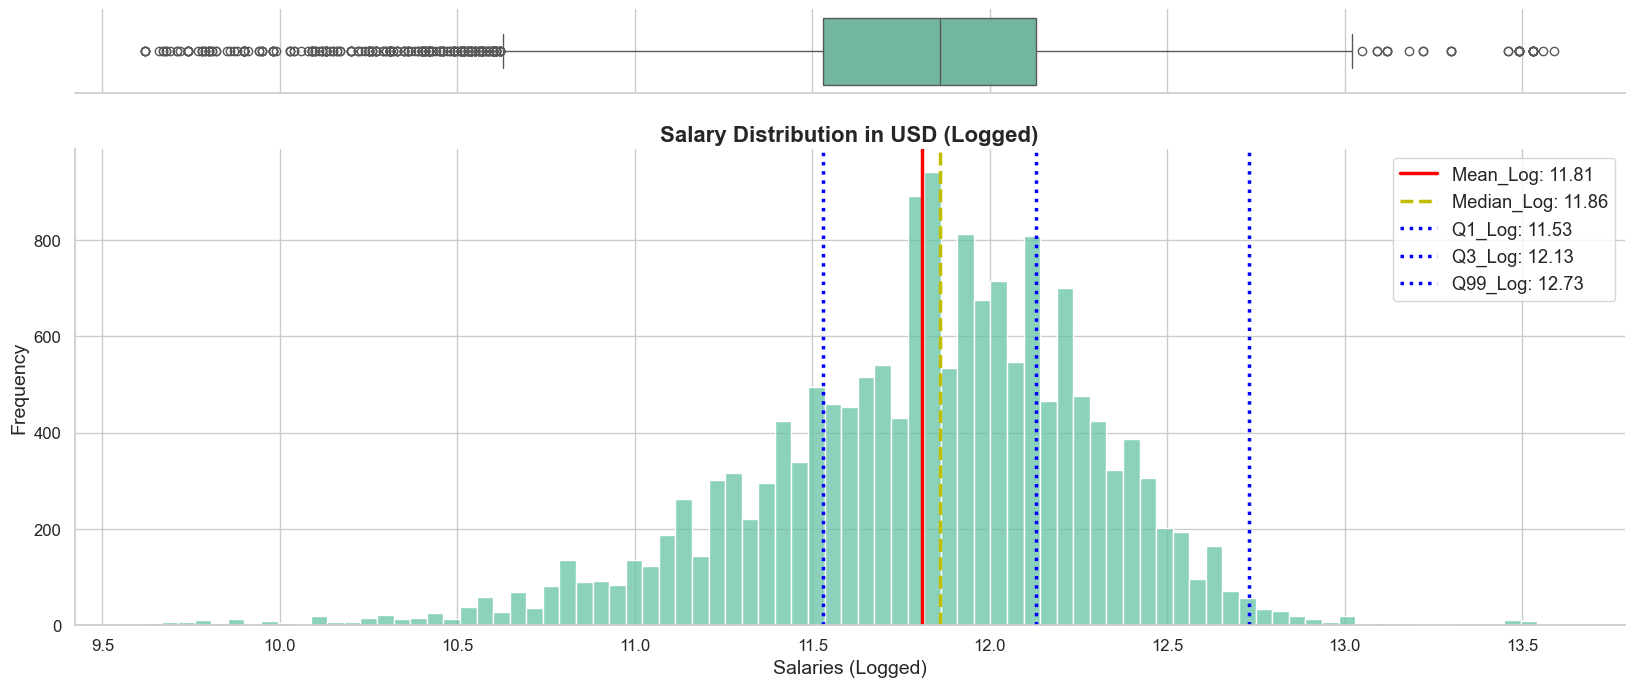

Mean_Log: 11.81

Median_Log: 11.86

Std_Log: 0.48

Q1: 11.53

Q3: 12.13

Q99: 12.73

The distribution is skewed to the left.
------------------------------
CV: 4.06%

The data in the sample are relatively homogeneous. Therefore, the mean is representative.
------------------------------
                     Quantity      %
salary_log_outliers                 
In                      16319  98.94
Out                       175   1.06
------------------------------
A logarithmic transformation was applied to normalize the salary distribution, achieving very similar mean and median values.
Additionally, the CV obtained (4.06%), indicates that the data has been homogenized.
Lastly, using Z-Score, outliers were identified to potentially include them in the model, enhancing its precision.


In [62]:
#Calculating descriptive statistics for logged salary data
mean_log= df_log['salary_in_usd_log'].mean().round(2)
median_log= df_log['salary_in_usd_log'].median().round(2)
std_log= df_log['salary_in_usd_log'].std().round(2)
cv_log= std_log / mean_log * 100
q1_log= df_log['salary_in_usd_log'].quantile(0.25).round(2)
q3_log= df_log['salary_in_usd_log'].quantile(0.75).round(2)
q99_log= df_log['salary_in_usd_log'].quantile(0.99).round(2)

#Creating a combined plot to visualize the distribution of logged salaries in USD

#Creating subplots
f, (ax_box, ax_hist)= plt.subplots(2, sharex= True, figsize=(20, 8), gridspec_kw= {'height_ratios': (0.15, 0.85)})

#Plotting histogram and boxplot
sns.histplot(df_log['salary_in_usd_log'], ax= ax_hist, kde= False)
sns.boxplot(df_log['salary_in_usd_log'], ax= ax_box, orient= 'h')

#Customizing plot aesthetics
ax_box.set(yticks= [])
sns.despine(ax= ax_hist)
sns.despine(ax= ax_box, left= True)
plt.title('Salary Distribution in USD (Logged)', fontsize=16, fontweight= 'bold')
plt.xlabel('Salaries (Logged)', fontsize= 14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

#Adding vertical lines for logged statistics
ax_hist.axvline(mean_log, color= 'r', linestyle= '-', linewidth= 2.5, label= f'Mean_Log: {mean_log}')
ax_hist.axvline(median_log, color= 'y', linestyle= '--', linewidth= 2.5, label= f'Median_Log: {median_log}')
ax_hist.axvline(q1_log, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q1_Log: {q1_log}')
ax_hist.axvline(q3_log, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q3_Log: {q3_log}')
ax_hist.axvline(q99_log, color= 'b', linestyle= ':', linewidth= 2.5, label= f'Q99_Log: {q99_log}')
ax_hist.legend()

plt.show()

#Printing statistics and analyzing the distribution of salaries in USD

#Printing basic statistics
print(f'Mean_Log: {mean_log}')
print('') #Blank line
print(f'Median_Log: {median_log}')
print('') #Blank line
print(f'Std_Log: {std_log}')
print('') #Blank line
print(f'Q1: {q1_log}')
print('') #Blank line
print(f'Q3: {q3_log}')
print('') #Blank line
print(f'Q99: {q99_log}')
print('') #Blank line

#Determining the skewness of the distribution
if mean_log== median_log:
    print('The distribution is symmetric.')
elif mean_log > median_log:
    print('The distribution is skewed to the right.')
else:
    print('The distribution is skewed to the left.')
print('-' * 30) #Line separator

#Calculating and printing the coefficient of variation (CV)
print(f'CV: {cv_log.round(2)}%')
print('') #Blank line

#Evaluating the homogeneity of the data based on CV
if cv_log <= 30:
    print('The data in the sample are relatively homogeneous. Therefore, the mean is representative.')
elif 30 < cv_log <= 70:
    print('The data in the sample are heterogeneous. Therefore, the mean is not representative.')
else:
    print('The data in the sample are very variable or heterogeneous. Therefore, the mean is not representative.')
print('-' * 30) #Line separator

#Z-Score
df_log['salary_log_z']= (df_log['salary_in_usd_log'] - mean_log)/ std_log
df_log['salary_log_outliers']= 0
df_log.loc[(df_log['salary_log_z'] > 3) | (df_log['salary_log_z'] < -3), 'salary_log_outliers']= 1
outliers_count= df_log['salary_log_outliers'].value_counts()
outliers_percentage= (df_log['salary_log_outliers'].value_counts() / len(df_log) * 100).round(2)
df_outliers= pd.DataFrame({'Quantity': outliers_count, '%': outliers_percentage})
df_outliers.index= df_outliers.index.map({0: 'In', 1: 'Out'})
print(df_outliers)
print('-' * 30) #Line separator

#Conclusion based on analysis
print('''A logarithmic transformation was applied to normalize the salary distribution, achieving very similar mean and median values.
Additionally, the CV obtained (4.06%), indicates that the data has been homogenized.
Lastly, using Z-Score, outliers were identified to potentially include them in the model, enhancing its precision.''')



### **Multiple Linear Regression Model**

In [63]:
#Importing modules for data splitting, model evaluation and performance metrics from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
#Encoding the DataFrame
import category_encoders as ce

#Target Encoding
target_cols= ['job_title', 'employee_residence', 'company_location']
target_encoder= ce.TargetEncoder(cols= target_cols, smoothing= 0.2)
df_log[target_cols]= target_encoder.fit_transform(df_log[target_cols], df_log['salary_in_usd_log']).round(2)

#One-Hot Encoding
df_log= pd.get_dummies(df_log, columns=['experience_level', 'employment_type', 'company_size'])

#DataFrame Encoded
df_log

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,salary_in_usd_log,salary_log_z,salary_log_outliers,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
0,2024,11.85,120000,11.63,0,11.61,11.70,-0.229167,0,False,False,True,False,False,False,True,False,False,False,True
1,2024,11.85,70000,11.63,0,11.61,11.16,-1.354167,0,False,False,True,False,False,False,True,False,False,False,True
2,2024,11.85,130000,11.88,0,11.88,11.78,-0.062500,0,False,False,True,False,True,False,False,False,False,True,False
3,2024,11.85,110000,11.88,0,11.88,11.61,-0.416667,0,False,False,True,False,True,False,False,False,False,True,False
4,2024,12.10,240000,11.88,0,11.88,12.39,1.208333,0,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,11.85,412000,11.88,100,11.88,12.93,2.333333,0,False,False,False,True,False,False,True,False,True,False,False
16490,2021,11.81,151000,11.88,100,11.88,11.93,0.250000,0,False,False,True,False,False,False,True,False,True,False,False
16491,2020,11.85,105000,11.88,100,11.88,11.56,-0.520833,0,True,False,False,False,False,False,True,False,False,False,True
16492,2020,11.00,100000,11.88,100,11.88,11.51,-0.625000,0,True,False,False,False,True,False,False,False,True,False,False


In [65]:
#Calculating Pearson correlation between 'salary_in_usd' and 'features'
print("Pearson correlation between 'salary_in_usd' and 'features'")
print('') #Blank line

for column in df_log.columns:
    if column!= 'salary_in_usd_log' and column not in ['salary_in_usd', 'salary_log_z', 'salary_log_outliers']:
        correlation= df_log[column].corr(df_log['salary_in_usd_log'], method= 'pearson').round(2)

        if correlation >= 0.3:
            print(f"With '{column}': {correlation}")
            print('') #Blank line

            #Assessing the strength of the correlation
            if correlation > 0.8:
                print("There is a strong positive linear relationship.")
            elif correlation >= 0.3:
                print("There is a moderate positive linear relationship.")
            print('-' * 30) #Line separator

print('Based on this results, I have decided to apply a multiple linear regression model as there appears to be a positive relationship with more than one feature.')

Pearson correlation between 'salary_in_usd' and 'features'

With 'job_title': 0.41

There is a moderate positive linear relationship.
------------------------------
With 'employee_residence': 0.41

There is a moderate positive linear relationship.
------------------------------
With 'company_location': 0.4

There is a moderate positive linear relationship.
------------------------------
With 'experience_level_SE': 0.33

There is a moderate positive linear relationship.
------------------------------
Based on this results, I have decided to apply a multiple linear regression model as there appears to be a positive relationship with more than one feature.


In [66]:
#Extracting Features and Target
X= df_log.drop(columns=['salary_in_usd', 'salary_in_usd_log', 'salary_log_z']) #Features
y= df_log[['salary_in_usd_log']] #Target

In [67]:
#Splitting data for Training and Testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)

In [68]:
#Creating and training the model
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
#Calculating the slope and intercept
slope= regressor.coef_
intercept= regressor.intercept_

#Constructing the equation of the best fit line
slope_value= slope[0]
intercept_value= intercept[0]
equation_parts= [f'{slope[0][i]:.2f} * {X.columns[i]}' for i in range(len(slope[0]))]
equation= f'y_log= ' + ' + '.join(equation_parts) + f' + {intercept[0]:.2f}'

print(f'The slope coefficients are: {slope.flatten()}')
print('') #Blank line
print(f'The intercept is: {intercept[0]:.2f}')
print('') #Blank line
print(f'The equation of the best fit line is: {equation}')

The slope coefficients are: [ 1.71119536e-02  8.21362831e-01  4.11374927e-01 -1.82331727e-04
  3.78462937e-01 -6.09955664e-01 -2.81761491e-01  2.72419356e-01
 -1.01853006e-01  1.11195141e-01  1.52879780e-01 -3.30929624e-01
  2.03668210e-01 -2.56183662e-02  6.46045945e-02  1.15845864e-01
 -1.80450458e-01]

The intercept is: -42.19

The equation of the best fit line is: y_log= 0.02 * work_year + 0.82 * job_title + 0.41 * employee_residence + -0.00 * remote_ratio + 0.38 * company_location + -0.61 * salary_log_outliers + -0.28 * experience_level_EN + 0.27 * experience_level_EX + -0.10 * experience_level_MI + 0.11 * experience_level_SE + 0.15 * employment_type_CT + -0.33 * employment_type_FL + 0.20 * employment_type_FT + -0.03 * employment_type_PT + 0.06 * company_size_L + 0.12 * company_size_M + -0.18 * company_size_S + -42.19


In [70]:
#Predicting on training and test sets
y_pred_test= regressor.predict(X_test)
y_pred_train= regressor.predict(X_train)

#Transforming the predictions back to the original scale
y_train_original= np.exp(y_train)
y_test_original= np.exp(y_test)
y_pred_train_original= np.exp(y_pred_train)
y_pred_test_original= np.exp(y_pred_test)

In [71]:
#Calculating MAE and RMSE on the original scale
training_mae= mean_absolute_error(y_train_original, y_pred_train_original)
testing_mae= mean_absolute_error(y_test_original, y_pred_test_original)
training_rmse= np.sqrt(mean_squared_error(y_train_original, y_pred_train_original))
testing_rmse= np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))

print(f"Training MAE - {training_mae.astype(int)}: On average, the model's salary predictions deviate by ±{training_mae.astype(int)} USD from the actual values in the training set.")
print(f"Testing MAE - {testing_mae.astype(int)}: The predictions for unseen data have an average deviation of ±{testing_mae.astype(int)} USD.")
print('') #Blank line
print('The close values between training and testing MAE indicate consistent model performance.')
print('-' * 30) #Line separator
print(f"Training RMSE - {training_rmse.astype(int)}: This value indicates the model's average prediction error in the training set, with a greater emphasis on larger errors. A higher RMSE suggests the presence of significant errors.")
print(f"Testing RMSE - {testing_rmse.astype(int)}: For unseen data, the average prediction error is {testing_rmse.astype(int)} USD.")
print('') #Blank line
print('The similarity between the training and testing RMSE suggests the model generalizes well, although the relatively high value indicates there are still significant prediction errors.')

Training MAE - 40300: On average, the model's salary predictions deviate by ±40300 USD from the actual values in the training set.
Testing MAE - 40761: The predictions for unseen data have an average deviation of ±40761 USD.

The close values between training and testing MAE indicate consistent model performance.
------------------------------
Training RMSE - 57611: This value indicates the model's average prediction error in the training set, with a greater emphasis on larger errors. A higher RMSE suggests the presence of significant errors.
Testing RMSE - 60563: For unseen data, the average prediction error is 60563 USD.

The similarity between the training and testing RMSE suggests the model generalizes well, although the relatively high value indicates there are still significant prediction errors.


In [72]:
#R2
r2_training_score= r2_score(y_train_original, y_pred_train_original)
print(f'Training R2: {r2_training_score}')
if r2_training_score >= 0.7:
    print('The model has a good fit. Variations in the dependent variable are well explained by the independent variables.')
else:
    print('The model has a limited fit. Predictions may not be very precise.')

print('-' * 30) #Line separator

r2_testing_score= r2_score(y_test_original, y_pred_test_original)
print(f'Testing R2: {r2_testing_score}')
if r2_testing_score >= 0.7:
    print('The model has a good fit. Variations in the dependent variable are well explained by the independent variables.')
else:
    print('The model has a limited fit. Predictions may not be very precise.')

Training R2: 0.2810145706464392
The model has a limited fit. Predictions may not be very precise.
------------------------------
Testing R2: 0.24730303983109592
The model has a limited fit. Predictions may not be very precise.


### **Conclusion**

Based on the **R2** result of 28.1%, it **indicates that only about 28.1% of the variability in salaries can be explained by the predictor variables included in the regression model**.<br>
This falls significantly short of the initial hypothesis aiming for at least 70% prediction effectiveness.

In conclusion, **the obtained R2 of 28.1% refutes the hypothesis that the regression model could achieve 70% prediction effectiveness**.<br>
This suggests that the **current predictor variables do not sufficiently capture the variations in observed salaries**, highlighting the need for either revising the predictors or exploring alternative modeling approaches to enhance predictive capability.